<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Deep learning</i> para la automatización de procesos empresariales</h1>
<h2 align="left"><i>A Strategy for Object Detection in Retail Sector - Inference</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Aplicaciones de Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>08/04/2023</i>
  <br><br>
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-applications-course/blob/main/2-retail-store-item-detection-inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-applications-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-python-beginners-course?style=social" alt="Fork"/>
    </a>
  </td>
</table>
<br>
<br>

---

En esta oportunidad implementaremos un prueba de concepto de una solución predictiva que detecte la escasez de productos en estantes de tiendas minoristas utilizando una red neuronal YOLOv5. Para lograr esto, se deben seguir varios pasos, como la recopilación y etiquetado de datos, el preprocesamiento de datos, el entrenamiento del modelo, la evaluación del modelo, la implementación del modelo en un entorno de producción y el monitoreo y mantenimiento del modelo.
Esta solución notificará de manera automática a la división operativa del equipo de carga cuando se detecte escasez de productos, permitiéndoles así llenar los anaqueles con más productos y favoreciendo enormemente los tiempos de respuesta. De esta manera, se espera que la solución evite que los clientes arriben a la tienda a comprar un producto y que este este desabastecido. Con esto, se pretende contribuir a la maximización de la facturación de la compañía.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-download"><b>Descargar el modelo</b></a></li>
    <li><a href="#2-utils"><b>Definir etiquetas y utilidades</b></a></li>
    <li><a href="#3-load"><b>Cargar la red neuronal artificial</b></a></li>
    <li><a href="#4-processing"><b>Preprocesamiento y posprocesamiento de las imágenes</b></a></li>
    <li><a href="#5-visualize"><b>Visualizar las predicciones</b></a></li>
    <li><a href="#6-detect"><b>Detectar productos</b></a></li>
    <li><a href="#7-predict"><b>Predecir o inferir</b></a></li>
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "<i>Deep learning</i> para la automatización de procesos empresariales"</b></a></li>
</ol>

<a id="1-download"></a>
## 1. Descargar el modelo

In [1]:
!wget https://github.com/joefavergel/datasets/raw/main/models/average_model.onnx -P .

--2023-11-09 20:06:48--  https://github.com/joefavergel/datasets/raw/main/models/average_model.onnx
Resolving github.com (github.com)... 

140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/joefavergel/datasets/main/models/average_model.onnx [following]
--2023-11-09 20:06:49--  https://raw.githubusercontent.com/joefavergel/datasets/main/models/average_model.onnx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48879455 (47M) [application/octet-stream]
Saving to: './average_model.onnx'

average_model.onnx  100%[===================>]  46.61M  13.5MB/s    in 4.1s    

2023-11-09 20:06:53 (11.5 MB/s) - './average_model.onnx' saved [48879455/48879455]



<a id="2-utils"></a>
## 2. Definir etiquetas y utilidades

In [2]:
import cv2


# # default coco classes
COCO_DEFAULT_LABELS = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", 
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]


class Colors:
    """Ultralytics color palette https://ultralytics.com/"""

    def __init__(self):
        # fmt: off
        hexs = ("FF3838", "FF9D97", "FF701F", "FFB21D", "CFD231", "48F90A", "92CC17", "3DDB86",
                "1A9334", "00D4BB", "2C99A8", "00C2FF", "344593", "6473FF", "0018EC", "8438FF",
                "520085", "CB38FF", "FF95C8", "FF37C7")
        # fmt: on
        self.palette = [self.hex2rgb(f"#{c}") for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i: int, bgr: bool = False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h: str):  # rgb order (PIL)
        return tuple(int(h[1 + i : 1 + i + 2], 16) for i in (0, 2, 4))


class Labels:
    """Labels Handler

    Args:
        labels (List[str]): Models labels (class name)

    Examples:
        Get label (class name) with color from class_id

        >>> labels = Labels(COCO_DEFAULT_LABELS)
        >>> labels(10, use_bgr=True)
    """

    colors = Colors()

    def __init__(self, labels):
        self.labels = labels

    def __call__(self, i, use_bgr=False):
        return self.labels[i], self.colors(i, use_bgr)


def log_info(header, body):
    print("\033[1m\033[94m" + header + ": \033[0m" + body)


def export_image(img, path):
    """Export numpy.ndarray to image if path is specified (isn't None)

    Args:
        img (numpy.ndarray): Image array
        path (str): Path to export
    """
    if path:
        print("🚀", end=" ")
        log_info("Exporting Image", path)
        cv2.imwrite(path, img)


<a id="3-load"></a>
## 3. Cargar la red neuronal artificial

In [ ]:
!pip install onnxruntime

In [3]:
import numpy as np
import cv2
import onnxruntime as ort


def log_warning(header, body):
    print("⚠️ \033[1m\033[93m" + header + ": \033[0m" + body)


class ORT_LOADER:
    """ONNXRUNTIME model handler"""

    def __init__(self, path: str, gpu: bool = False):
        self._load_model(path, gpu)

    def _load_model(self, path: str, use_gpu: bool):
        """Load model and get model input and output information"""
        is_gpu_available = ort.get_device() == "GPU"
        if not is_gpu_available and use_gpu:
            log_warning("GPU", "GPU is not available, using CPU to process.")
            use_gpu = False

        providers = (
            ["CUDAExecutionProvider", "CPUExecutionProvider"]  # use cuda if gpu is available
            if use_gpu
            else ["CPUExecutionProvider"]  # use CPU
        )  # get providers
        self.net = ort.InferenceSession(path, providers=providers)  # load session

        net_input = self.net.get_inputs()[0]  # get input info
        self.input_name = net_input.name
        self.input_shape = net_input.shape
        self.output_names = [x.name for x in self.net.get_outputs()]  # get output info

    def assert_input_shape(self, input_shape=None):
        """check input shape"""
        if input_shape:
            if input_shape != self.input_shape:
                log_warning(
                    "Input Shape",
                    "Model have different input shape with the original input shape on metadata! "
                    + "It can lead to lower detection performance.",
                )

    def forward(self, input_):
        """Get model prediction"""
        return self.net.run(self.output_names, {self.input_name: input_})

    def warmup(self):
        "Warming up model"
        for _ in range(3):
            dummy = np.random.rand(*self.input_shape).astype(np.float32)
            _ = self.forward(dummy)


class DNN_LOADER:
    """OPENCV DNN model handler"""

    def __init__(self, path: str, gpu: bool = False):
        self.net = cv2.dnn.readNet(path)  # overload net

        # get input and output info from ort
        net_ort = ORT_LOADER(path)
        self.input_name = net_ort.input_name
        self.input_shape = net_ort.input_shape
        self.output_names = net_ort.output_names

        is_gpu_available = True if cv2.cuda.getCudaEnabledDeviceCount() else False
        if not is_gpu_available and gpu:
            log_warning("GPU", "GPU is not available, using CPU to process.")
            gpu = False

        if gpu:  # use CUDA if available
            self.net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
            self.net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
        else:  # use CPU
            self.net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
            self.net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

    def assert_input_shape(self, input_shape=None):
        """check input shape"""
        if input_shape:
            if input_shape != self.input_shape:
                log_warning(
                    "Input Shape",
                    "Model have different input shape with the original input shape on metadata! "
                    + "It can lead to lower detection performance.",
                )

    def forward(self, input_):
        """Get model prediction"""
        self.net.setInput(input_, self.input_name)
        return self.net.forward(self.output_names)

    def warmup(self):
        "Warming up model"
        for _ in range(3):
            dummy = np.random.rand(*self.input_shape).astype(np.float32)
            _ = self.forward(dummy)


def load_net(path, gpu=False, dnn=False):
    """Load NET

    Args:
        path (str): YOLO-NAS ONNX model path
        gpu (bool, optional): Using GPU?. Defaults to False.
        dnn (bool, optional): Use OpenCV DNN?. Defaults to False.

    Returns:
        Optional[ORT_LOADER, DNN_LOADER]: Net loader
    """
    if dnn:  # if using OpenCV DNN
        return DNN_LOADER(path, gpu)
    return ORT_LOADER(path, gpu)


<a id="4-processing"></a>
## 4. Preprocesamiento y posprocesamiento de las imágenes

In [4]:
import numpy as np
import cv2

YOLO_NAS_DEFAULT_PROCESSING_STEPS = [
    {"DetLongMaxRescale": None},
    {"CenterPad": {"pad_value": 114}},
    {"Standardize": {"max_value": 255.0}},
]


class Preprocessing:
    """Preprocessing Handler

    Args:
        steps (List[Dict]): Preprocessing steps, list of dictionary contains name and args.
        out_shape (Tuple[int]): image out shapes [h, w].

    Examples:
        Simple preprocessing image

        >>> prep = Preprocessing([{"DetLongMaxRescale": None}])
        >>> prep(img)
    """

    def __init__(self, steps, out_shape):
        self.steps = steps
        self.out_shape = out_shape

    @staticmethod
    def __rescale_img(img, out_shape):
        """default rescale func"""
        return cv2.resize(img, dsize=out_shape, interpolation=cv2.INTER_LINEAR).astype(np.uint8)

    def _standarize(self, img, max_value):
        """standarize img based on max value"""
        return (img / max_value).astype(np.float32), None

    def _det_rescale(self, img):
        """Rescale image to output based with scale factors"""
        scale_factor_h, scale_factor_w = (
            self.out_shape[0] / img.shape[0],
            self.out_shape[1] / img.shape[1],
        )  # calc scale factor
        return self.__rescale_img(img, self.out_shape), {
            "scale_factors": (scale_factor_w, scale_factor_h)
        }

    def _det_long_max_rescale(self, img):
        """Rescale image to output based on max size"""
        height, width = img.shape[:2]
        scale_factor = min(
            (self.out_shape[1] - 4) / height, (self.out_shape[0] - 4) / width
        )  # calc scale factor from max size

        if scale_factor != 1.0:  # resize if scale factor isn't 1
            new_height, new_width = round(height * scale_factor), round(width * scale_factor)
            img = self.__rescale_img(img, (new_width, new_height))

        return img, {"scale_factors": (scale_factor, scale_factor)}

    def _bot_right_pad(self, img, pad_value):
        """Pad bottom and right only (palce image on top left)"""
        pad_height, pad_width = self.out_shape[1] - img.shape[0], self.out_shape[0] - img.shape[1]
        return cv2.copyMakeBorder(
            img, 0, pad_height, 0, pad_width, cv2.BORDER_CONSTANT, value=[pad_value] * img.shape[-1]
        ), {"padding": (0, pad_height, 0, pad_width)}

    def _center_pad(self, img, pad_value):
        """Pad center (palce image on center)"""
        pad_height, pad_width = self.out_shape[1] - img.shape[0], self.out_shape[0] - img.shape[1]
        pad_top, pad_left = pad_height // 2, pad_width // 2
        return cv2.copyMakeBorder(
            img,
            pad_top,
            pad_height - pad_top,
            pad_left,
            pad_width - pad_left,
            cv2.BORDER_CONSTANT,
            value=[pad_value] * img.shape[-1],
        ), {"padding": (pad_top, pad_height - pad_top, pad_left, pad_width - pad_left)}

    def _normalize(self, img, mean, std):
        """Normalize image based on mean and stdev"""
        return (img - np.asarray(mean)) / np.asarray(std), None

    def _call_fn(self, name):
        """Call prep func from string name"""
        mapper = {
            "Standardize": self._standarize,
            "DetRescale": self._det_rescale,
            "DetLongMaxRescale": self._det_long_max_rescale,
            "BotRightPad": self._bot_right_pad,
            "CenterPad": self._center_pad,
            "Normalize": self._normalize,
        }
        return mapper[name]

    def __call__(self, img):
        """Do all preprocessing steps on single image"""
        img = img.copy()  # copy image
        metadata = []  # init metadata list

        for st in self.steps:  # loop processing steps
            if not st:  # if step isn't None
                continue
            name, kwargs = list(st.items())[0]  # name and kwargs from step
            img, meta = (
                self._call_fn(name)(img, **kwargs) if kwargs else self._call_fn(name)(img)
            )  # process image
            metadata.append(meta)  # append metadata

        img = cv2.dnn.blobFromImage(img, swapRB=True)  # image to blob [1, c, h, w] RGB
        return img, metadata


class Postprocessing:
    """Postprocessing Handler

    Args:
        steps (List[Dict]): Preprocessing steps, list of dictionary contains name and args.
        iou_thres (float): Float representing NMS/IOU threshold.
        score_thres (float): image out shapes [h, w].

    Examples:
        Postprocessing outputs (boxes, scores)

        >>> postp = Postprocessing([{"DetLongMaxRescale": None}], o.45, 0.25)
        >>> prep(output, prep_metadata)
    """

    def __init__(self, steps, iou_thres, score_thres):
        self.steps = steps
        self.iou_thres = iou_thres
        self.score_thres = score_thres

    def _rescale_boxes(self, boxes, metadata):
        """Rescale boxes to original image size"""
        scale_factors_w, scale_factors_h = metadata["scale_factors"]
        boxes[:, [0, 2]] /= scale_factors_w
        boxes[:, [1, 3]] /= scale_factors_h
        return boxes

    def _shift_bboxes(self, boxes, metadata):
        """Shift boxes because of padding"""
        pad_top, _, pad_left, _ = metadata["padding"]
        boxes[:, [0, 2]] -= pad_left
        boxes[:, [1, 3]] -= pad_top
        return boxes

    def _call_fn(self, name):
        """Call postp func from string name"""
        mapper = {
            "DetRescale": self._rescale_boxes,
            "DetLongMaxRescale": self._rescale_boxes,
            "BotRightPad": self._shift_bboxes,
            "CenterPad": self._shift_bboxes,
            "Standardize": None,
            "Normalize": None,
        }
        return mapper[name]

    def __call__(self, outputs, metadata):
        """Do all preprocessing steps on single output"""
        boxes, raw_scores = outputs  # get boxes and scores from outputs
        boxes = np.squeeze(boxes, 0)  # squeeze boxes [1, n, 4] => [n, 4]

        metadata = metadata.copy()  # copy preprocessing metadata
        for st in reversed(self.steps):  # reverse looping processing steps
            if not st:  # if step is None
                continue
            name, _ = list(st.items())[0]  # get step name
            meta = metadata.pop()  # get step metadata
            if not self._call_fn(name):  # if step is None
                continue
            boxes = self._call_fn(name)(boxes, meta)  # process boxes

        # change xyxy to xywh
        boxes[:, 2] -= boxes[:, 0]
        boxes[:, 3] -= boxes[:, 1]

        # find max from scores and flatten it [1, n, num_class] => [n]
        scores = raw_scores.max(axis=2).flatten()
        # find index from max scores (class_id) and flatten it [1, n, num_class] => [n]
        classes = np.argmax(raw_scores, axis=2).flatten()
        return boxes, scores, classes


<a id="5-visualize"></a>
## 5. Visualizar las predicciones

In [5]:
import numpy as np
import cv2


def draw_box(source, box, label, score, color, alpha=0.25):
    """Draw boxes on images"""
    # fill box
    crop_box = source[
        box[1] : (box[1] + box[3]), box[0] : (box[0] + box[2])
    ]  # crop box from source
    color_box = np.ones([*crop_box.shape[:2], 1], dtype=np.uint8) * np.asarray(
        color, dtype=np.uint8
    )  # color box (same size with crop). [h, w, 1] * [c] => [h, w, c]
    cv2.addWeighted(
        crop_box, 1 - alpha, color_box, alpha, 1.0, crop_box
    )  # weighted from color box to source

    cv2.rectangle(source, box, color, 2)  # draw box

    # measuring text
    size = min(source.shape[:2]) * 0.0007
    thickness = int(min(source.shape[:2]) * 0.001)
    (label_width, label_height), _ = cv2.getTextSize(
        f"{label} - {round(score, 2)}%",
        cv2.FONT_HERSHEY_SIMPLEX,
        size,
        thickness,
    )
    # draw labels (filled rect with text inside)
    cv2.rectangle(
        source,
        (box[0] - 1, box[1] - int(label_height * 2)),
        (box[0] + int(label_width * 1.1), box[1]),
        color,
        cv2.FILLED,
    )
    cv2.putText(
        source,
        f"{label} - {round(score, 2)}%",
        (box[0], box[1] - int(label_height * 0.7)),
        cv2.FONT_HERSHEY_SIMPLEX,
        size,
        [255, 255, 255],
        thickness,
        cv2.LINE_AA,
    )


<a id="6-detect"></a>
## 6. Detectar productos

In [6]:
def detect(net, source, pre_process, post_process, labels):
    net_input = source.copy()  # copy source array
    input_, prep_meta = pre_process(net_input)  # run preprocess
    outputs = net.forward(input_)  # forward

    boxes, scores, classes = post_process(outputs, prep_meta)  # postprocess output
    selected = cv2.dnn.NMSBoxes(
        boxes, scores, post_process.score_thres, post_process.iou_thres
    )  # run nms to filter boxes

    for i in selected:  # loop through selected idx
        box = boxes[i, :].astype(np.int32).flatten()  # get box
        score = float(scores[i]) * 100  # percentage score
        label, color = labels(classes[i], use_bgr=True)  # get label and color class_id

        draw_box(source, box, label, score, color)  # draw boxes
    return source  # Image array after draw process

<a id="7-predict"></a>
## 7. Predecir o inferir

In [7]:
use_gpu = True
use_opencv_dnn_runtime = False
model_path = "average_model.onnx"

net = load_net(model_path, use_gpu, use_opencv_dnn_runtime)
net.assert_input_shape([1,3,640,640])
net.warmup()

⚠️ GPU: GPU is not available, using CPU to process.


In [8]:
prep_steps = [
    {"DetLongMaxRescale": None},
    {"BotRightPad": {"pad_value": 114}}
]

iou_thres = 0.65
score_thres = 0.5
labels = ["Item"]

_, _, input_height, input_width = net.input_shape  # get input height and width [b, c, h, w]

pre_process = Preprocessing(
    prep_steps, (input_height, input_width)
)

post_process = Postprocessing(
    prep_steps,
    iou_thres,
    score_thres,
)

labels = Labels(labels)

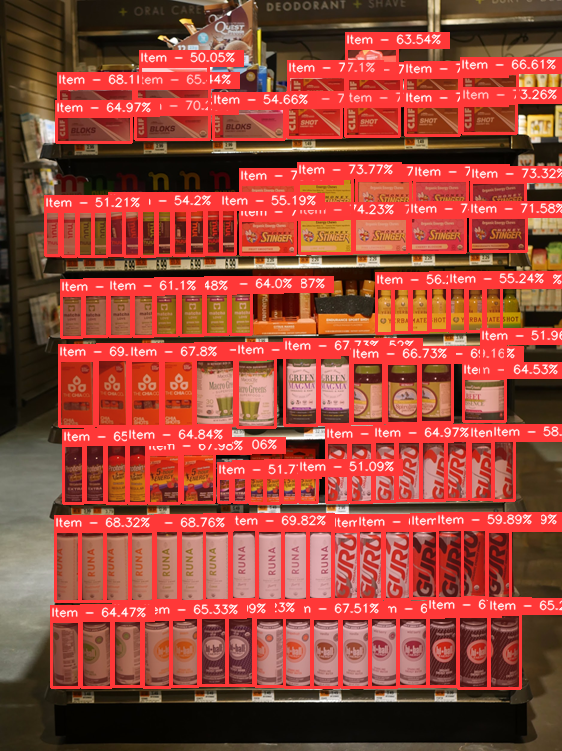

In [9]:
import cv2
import numpy as np
from PIL import Image
import urllib.request


url = "https://www.repsly.com/hubfs/9._Scripts_DEV/Web_Dev/Repsly%20Zg%20Projects/Blog/3p_Shelf_Presence/3p-shelf.png"
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)

img = detect(net, img, pre_process, post_process, labels)

Image.fromarray(img[:,:,::-1])

In [10]:
# PUT YOUR CODE HERE

# 6. Ejercicios caso práctico: "A Strategy for Object Detection in Retail Sector - Inference"

Implemente una nueva celda en la que defina un nuevo conjunto de imágenes de internet, detecte los objetos en estas y vaya modificando la variable `iou_thres` (al menos tres valores diferentes). Explique que controla dicha variable.